# Current population of Germany by Marital Status

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
sns.set_theme(style='darkgrid')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('Population Germany, reference date, marital status.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Registered same-sex partnership,Same-sex partnership dissolved,Same-sex partner deceased,Total
0,1991-12-31,30946691,39011038,6590431,3726404,-,-,-,80274564
1,1992-12-31,31390819,39241802,6564622,3777389,-,-,-,80974632
2,1993-12-31,31677162,39258167,6537510,3865254,-,-,-,81338093
3,1994-12-31,31840613,39222387,6507654,3967949,-,-,-,81538603
4,1995-12-31,32086658,39173015,6478341,4079485,-,-,-,81817499


In [5]:
df.tail()

,ReferenceDate,Single,Married,Widowed,Divorced,Registered same-sex partnership,Same-sex partnership dissolved,Same-sex partner deceased,Total
25,2016-12-31,34663318,35817341,5685734,6207699,128712,15318,3531,82521653
26,2017-12-31,35074789,35680049,5661234,6217800,136953,17419,4107,82792351
27,2018-12-31,35450116,35579183,5637148,6236753,92272,19216,4525,83019213
28,2019-12-31,35791445,35473315,5621393,6280558,-,-,-,83166711
29,2020-12-31,36085603,35165151,5597892,6306385,-,-,-,83155031


In [6]:
df.shape                  # df dimensions

(30, 9)

In [7]:
df1 = df[['ReferenceDate', 'Single', 'Married', 'Widowed', 'Divorced', 'Total']]
df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total
0,1991-12-31,30946691,39011038,6590431,3726404,80274564
1,1992-12-31,31390819,39241802,6564622,3777389,80974632
2,1993-12-31,31677162,39258167,6537510,3865254,81338093
3,1994-12-31,31840613,39222387,6507654,3967949,81538603
4,1995-12-31,32086658,39173015,6478341,4079485,81817499


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  30 non-null     object
 1   Single         30 non-null     int64 
 2   Married        30 non-null     int64 
 3   Widowed        30 non-null     int64 
 4   Divorced       30 non-null     int64 
 5   Total          30 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [9]:
df1['Year'] = pd.DatetimeIndex(df1['ReferenceDate']).year
df1['Month'] = pd.DatetimeIndex(df1['ReferenceDate']).month
df1['Day'] = pd.DatetimeIndex(df1['ReferenceDate']).day

df1.head(10)

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31
5,1996-12-31,32316847,39053399,6442517,4199399,82012162,1996,12,31
6,1997-12-31,32472590,38840687,6405669,4338433,82057379,1997,12,31
7,1998-12-31,32599758,38592438,6368735,4476080,82037011,1998,12,31
8,1999-12-31,32830596,38455051,6284840,4592988,82163475,1999,12,31
9,2000-12-31,33005201,38233453,6239625,4781261,82259540,2000,12,31


In [10]:
single = df1['Single']
married = df1['Married']
widowed = df1['Widowed']
divorced = df1['Divorced']
total = df1['Total']

# function to calculate marital status percentages
def ratio_calc(df, x, y):                     
    return x / y

df1['SinglePct'] = ratio_calc(df, x=single, y=total)
df1['MarriedPct'] = ratio_calc(df, x=married, y=total)
df1['WidowedPct'] = ratio_calc(df, x=widowed, y=total)
df1['DivorcedPct'] = ratio_calc(df, x=divorced, y=total)

df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day,SinglePct,MarriedPct,WidowedPct,DivorcedPct
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31,0.385511,0.485970,0.082099,0.046421
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31,0.387662,0.484618,0.081070,0.046649
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31,0.389451,0.482654,0.080375,0.047521
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31,0.390497,0.481028,0.079811,0.048663
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31,0.392174,0.478785,0.079180,0.049861


In [11]:
# round percentages to 2 decimal places
df1['SinglePct'] = np.round(df1['SinglePct'], 2)
df1['MarriedPct'] = np.round(df1['MarriedPct'], 2)
df1['WidowedPct'] = np.round(df1['WidowedPct'], 2)
df1['DivorcedPct'] = np.round(df1['DivorcedPct'], 2)

df1.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day,SinglePct,MarriedPct,WidowedPct,DivorcedPct
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31,0.39,0.49,0.08,0.05
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31,0.39,0.48,0.08,0.05
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31,0.39,0.48,0.08,0.05
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31,0.39,0.48,0.08,0.05
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31,0.39,0.48,0.08,0.05


In [12]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Year Grouping

In [13]:
df2 = df1.iloc[:10]                                  # year 1991 - 2000
df3 = df1.iloc[10:]                                  # year 2001 - 2020

In [14]:
df2.head()

,ReferenceDate,Single,Married,Widowed,Divorced,Total,Year,Month,Day,SinglePct,MarriedPct,WidowedPct,DivorcedPct
0,1991-12-31,30946691,39011038,6590431,3726404,80274564,1991,12,31,0.39,0.49,0.08,0.05
1,1992-12-31,31390819,39241802,6564622,3777389,80974632,1992,12,31,0.39,0.48,0.08,0.05
2,1993-12-31,31677162,39258167,6537510,3865254,81338093,1993,12,31,0.39,0.48,0.08,0.05
3,1994-12-31,31840613,39222387,6507654,3967949,81538603,1994,12,31,0.39,0.48,0.08,0.05
4,1995-12-31,32086658,39173015,6478341,4079485,81817499,1995,12,31,0.39,0.48,0.08,0.05


# 1991 - 2000

<AxesSubplot:xlabel='Year', ylabel='DivorcedPct'>

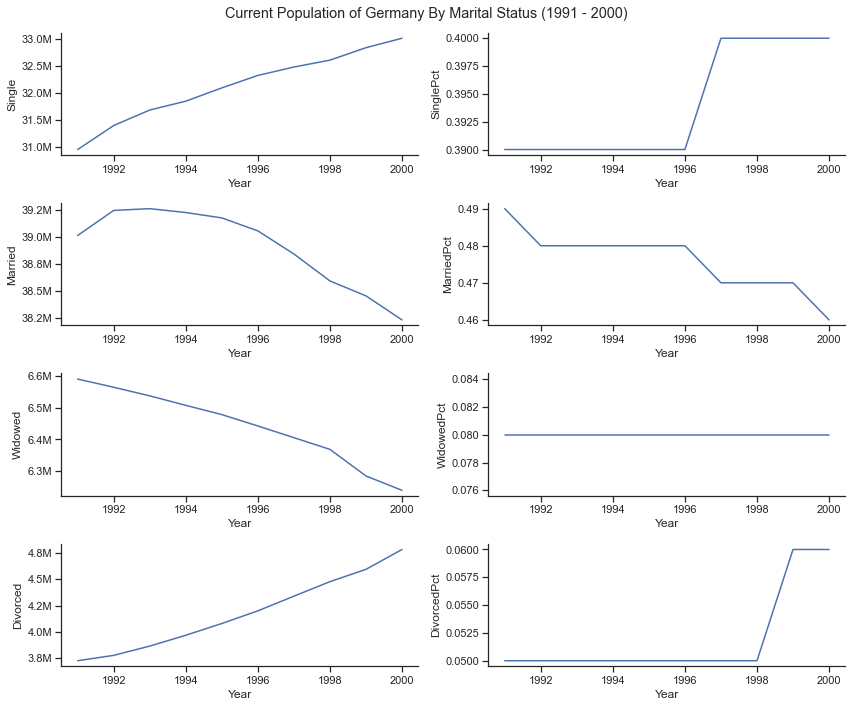

In [15]:
sns.set_theme(style='ticks')
palette = sns.color_palette('rocket_r')

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 10))
sns.despine(fig)
fig.suptitle('Current Population of Germany By Marital Status (1991 - 2000)')

# Lineplot of Single and Percentage Single
sns.lineplot(
    x='Year', y='Single',
    data=df2, ax=ax1
)
ax1.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='SinglePct',
    data=df2, ax=ax2
)

# Lineplot of Married and Percentage Married
sns.lineplot(
    x='Year', y='Married',
    data=df2, ax=ax3
)
ax3.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='MarriedPct',
    data=df2, ax=ax4
)

# Lineplot of Widowed and Percentage Widowed
sns.lineplot(
    x='Year', y='Widowed',
    data=df2, ax=ax5
)
ax5.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='WidowedPct',
    data=df2, ax=ax6
)

# Lineplot of Divorced and Percentage Divorced
sns.lineplot(
    x='Year', y='Divorced',
    data=df2, ax=ax7
)
ax7.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='DivorcedPct',
    data=df2, ax=ax8
)


# 2000 -2020

<AxesSubplot:xlabel='Year', ylabel='DivorcedPct'>

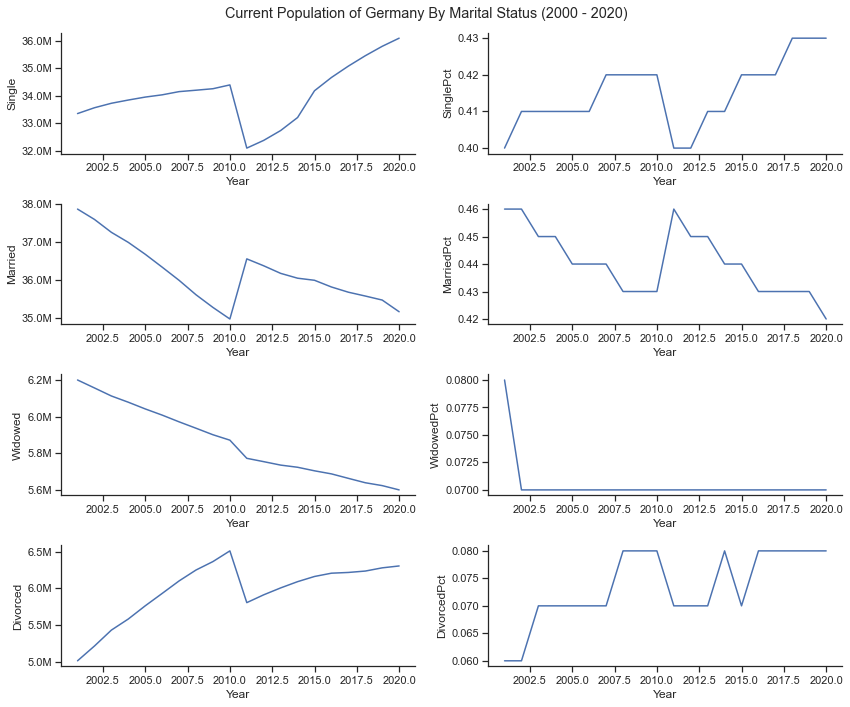

In [16]:
sns.set_theme(style='ticks')
palette = sns.color_palette('rocket_r')

fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 10))
sns.despine(fig1)
fig1.suptitle('Current Population of Germany By Marital Status (2000 - 2020)')

# Lineplot of Single and Percentage Single
sns.lineplot(
    x='Year', y='Single',
    data=df3, ax=ax1
)
ax1.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='SinglePct',
    data=df3, ax=ax2
)

# Lineplot of Married and Percentage Married
sns.lineplot(
    x='Year', y='Married',
    data=df3, ax=ax3
)
ax3.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='MarriedPct',
    data=df3, ax=ax4
)

# Lineplot of Widowed and Percentage Widowed
sns.lineplot(
    x='Year', y='Widowed',
    data=df3, ax=ax5
)
ax5.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='WidowedPct',
    data=df3, ax=ax6
)

# Lineplot of Divorced and Percentage Divorced
sns.lineplot(
    x='Year', y='Divorced',
    data=df3, ax=ax7
)
ax7.yaxis.set_major_formatter(formatter)

sns.lineplot(
    x='Year', y='DivorcedPct',
    data=df3, ax=ax8
)